#  Telecom Customer Churn Prediction. 


<img src="https://storage.googleapis.com/kaggle-datasets-images/2321135/3907949/b0bdc9ae114288b030a4c2a74ae4a939/dataset-cover.png?t=2022-07-09-07-22-29"/>

## Import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading dataset.
df = pd.read_csv('./cleaned-telecom-data.csv')
df.head()

,Unnamed: 0,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [3]:
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

The data consist of 4835 rows and 37 columns


## Exploratory Data Analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4835 non-null   int64  
 1   Customer ID                        4835 non-null   object 
 2   Gender                             4835 non-null   object 
 3   Age                                4835 non-null   int64  
 4   Married                            4835 non-null   object 
 5   Number of Dependents               4835 non-null   int64  
 6   City                               4835 non-null   object 
 7   Zip Code                           4835 non-null   int64  
 8   Latitude                           4835 non-null   float64
 9   Longitude                          4835 non-null   float64
 10  Number of Referrals                4835 non-null   int64  
 11  Tenure in Months                   4835 non-null   int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4835.0,3522.757394,2034.396529,0.000000,1769.000000,3532.000000,5272.500000,7041.000000
Age,4835.0,47.761117,17.302674,19.000000,33.000000,47.000000,62.000000,80.000000
Number of Dependents,4835.0,0.376008,0.875636,0.000000,0.000000,0.000000,0.000000,8.000000
Zip Code,4835.0,93460.340021,1847.849069,90001.000000,92102.000000,93446.000000,95323.000000,96150.000000
Latitude,4835.0,36.128008,2.475271,32.555828,33.954017,35.861928,38.123544,41.962127
Longitude,4835.0,-119.692729,2.152471,-124.301372,-121.723877,-119.402525,-117.898722,-114.192901
Number of Referrals,4835.0,1.894519,2.940740,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,4835.0,33.042399,24.635247,1.000000,9.000000,30.000000,56.000000,72.000000
Avg Monthly Long Distance Charges,4835.0,25.561456,14.241440,1.010000,13.040000,25.820000,37.970000,49.990000
Avg Monthly GB Download,4835.0,26.086660,19.560990,2.000000,13.000000,21.000000,30.000000,85.000000


In [6]:
df.isnull().sum()

Unnamed: 0                           0
Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music          

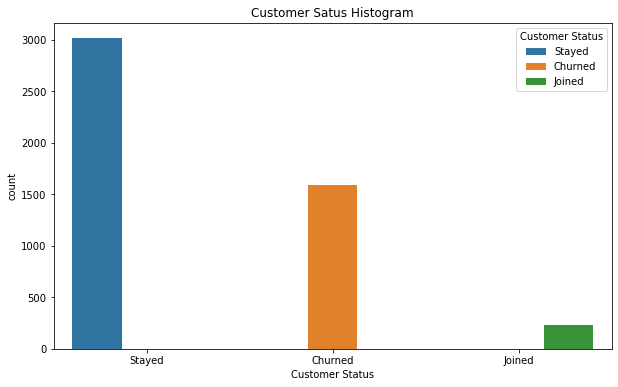

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Customer Status', hue='Customer Status')
plt.title('Customer Satus Histogram')
plt.show()

In [8]:
df['Customer Status'].value_counts()

Stayed     3015
Churned    1586
Joined      234
Name: Customer Status, dtype: int64

In [9]:
df1 = df[df['Customer Status'] != 'Joined']
df1['Customer Status'].nunique()

2

In [10]:
num_cols = [col for col in df1.columns if df1[col].dtype != 'object']
cat_cols = [col for col in df1.columns if df1[col].dtype == 'object']

In [11]:
del cat_cols[-1]
del cat_cols[0]
cat_cols

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

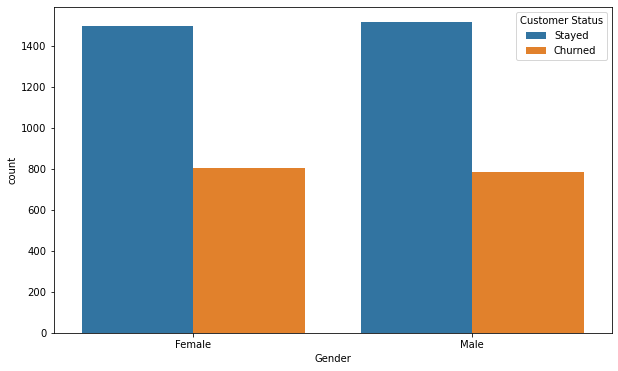

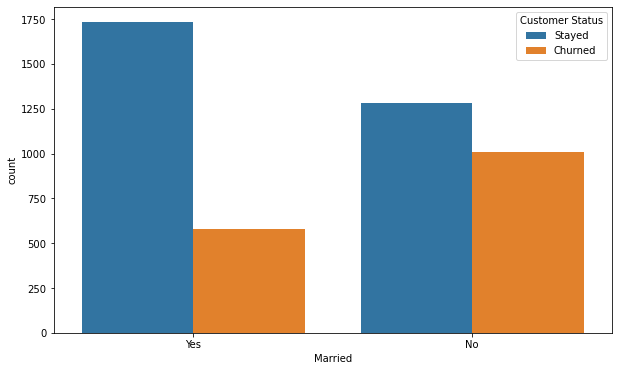

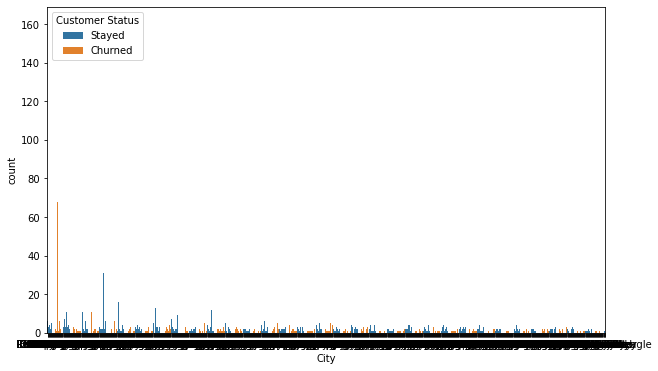

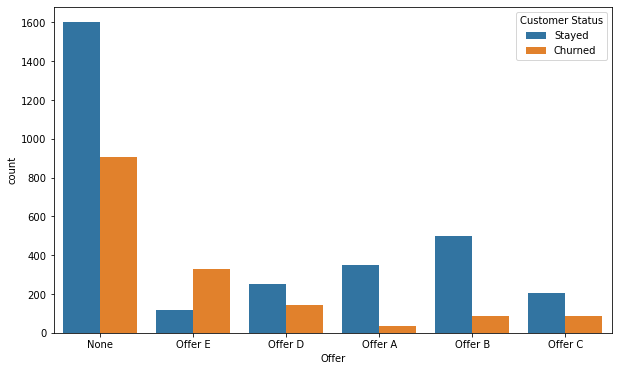

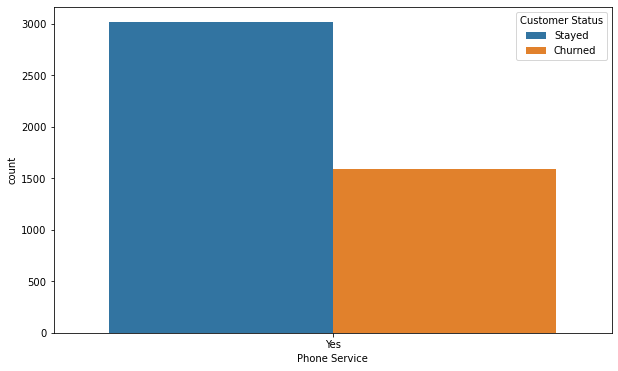

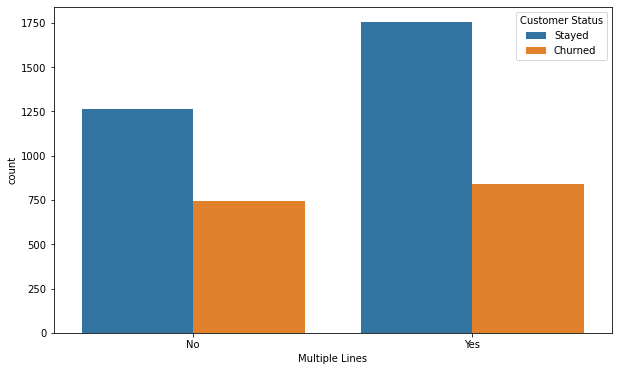

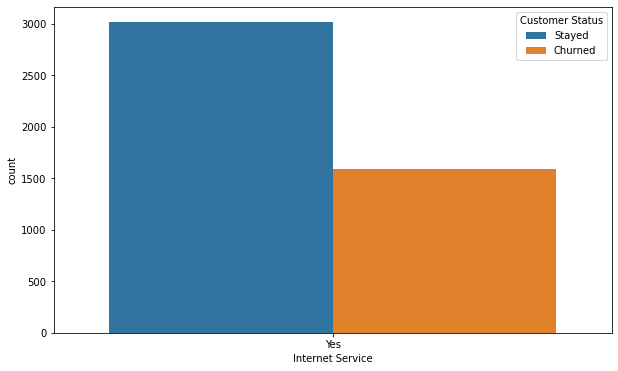

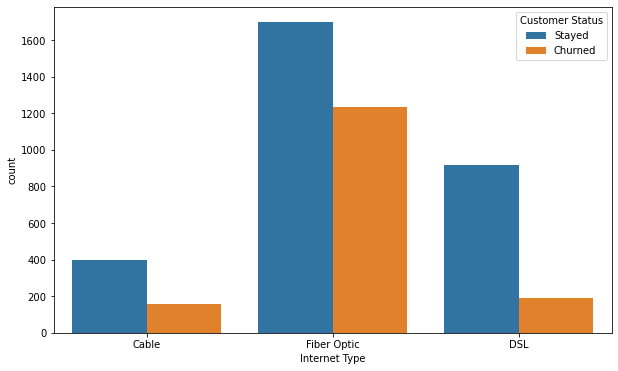

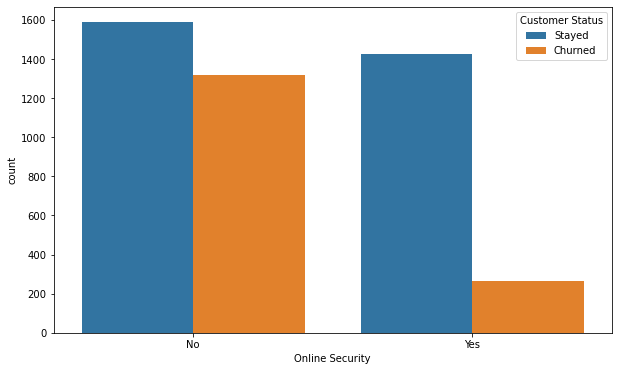

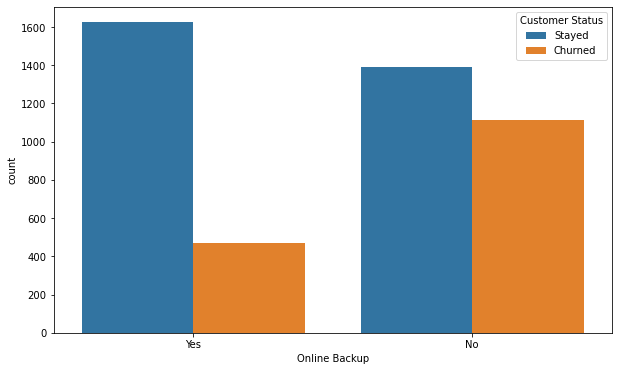

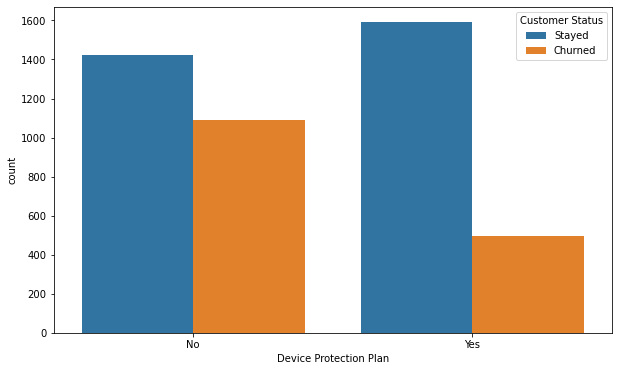

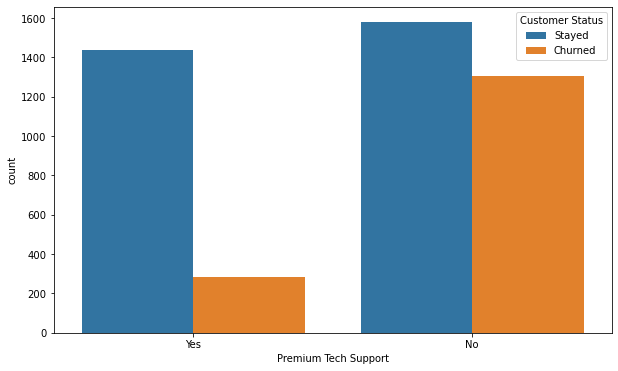

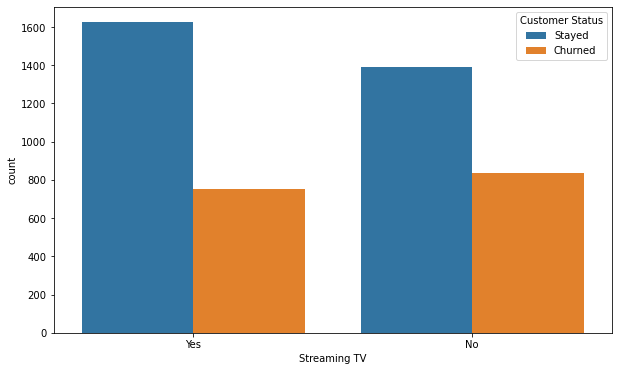

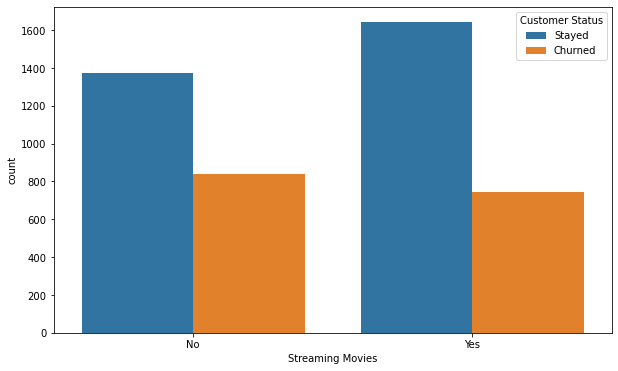

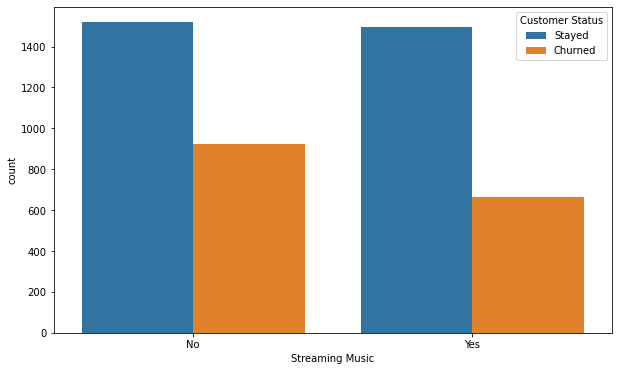

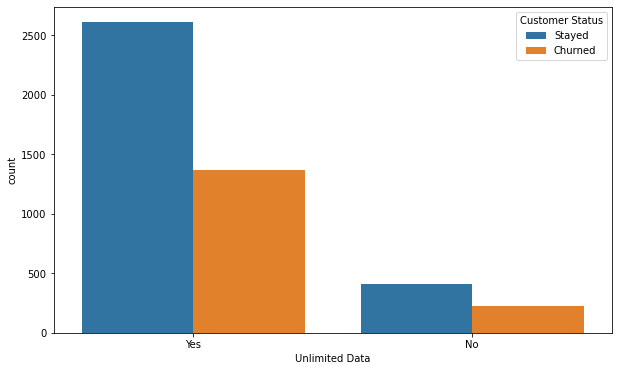

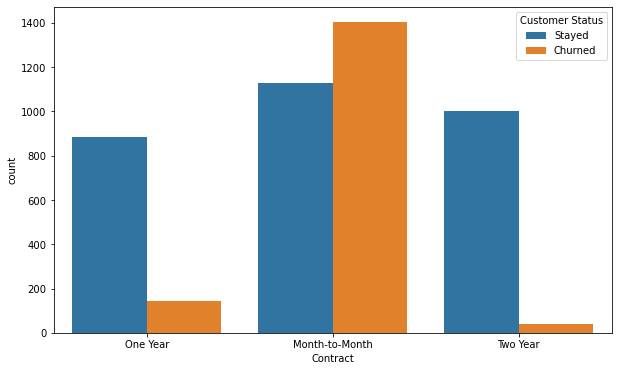

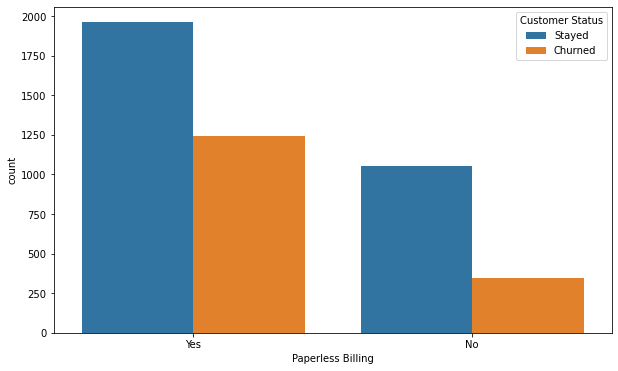

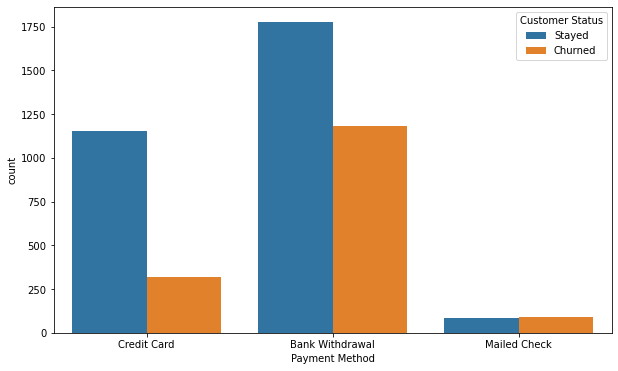

In [12]:
for i, col in enumerate(cat_cols):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df1, x=col, hue='Customer Status')

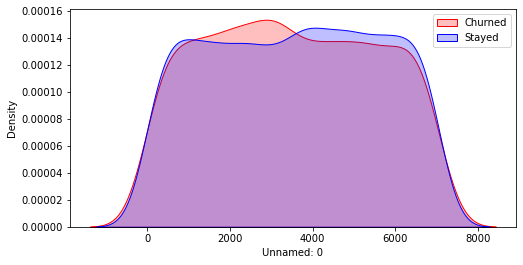

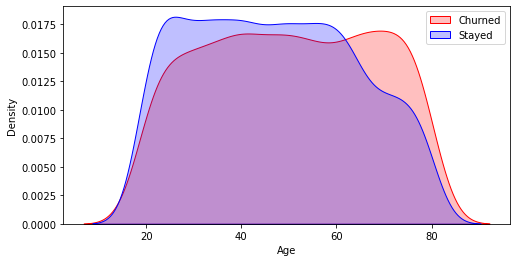

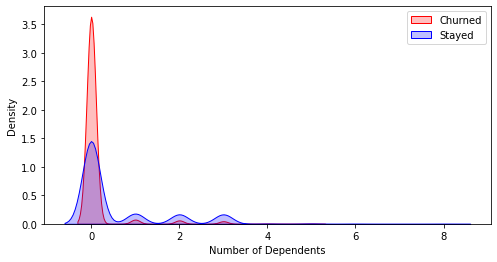

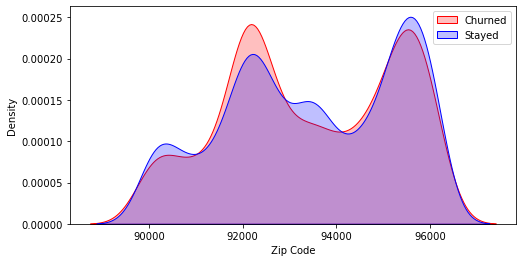

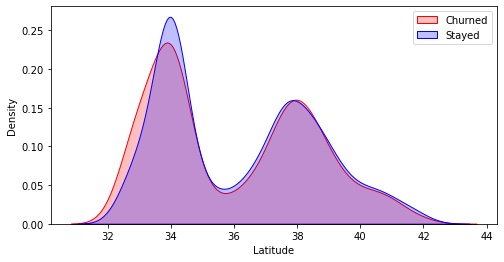

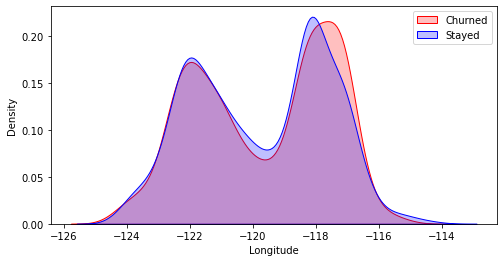

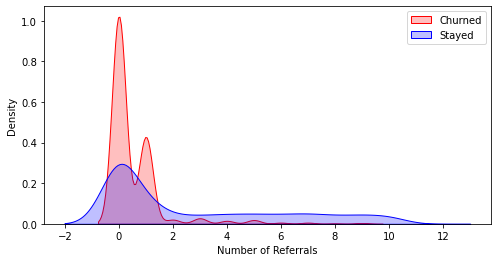

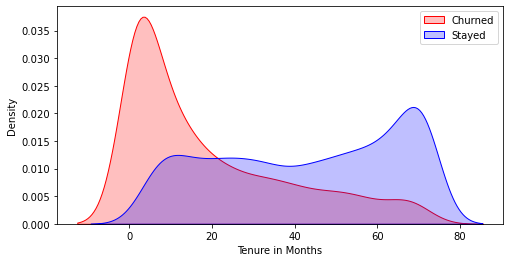

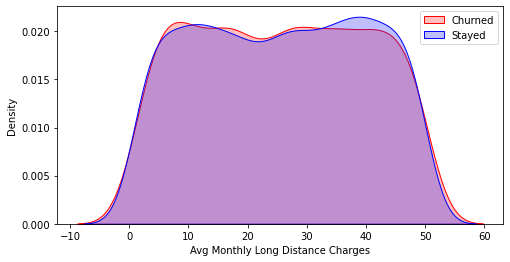

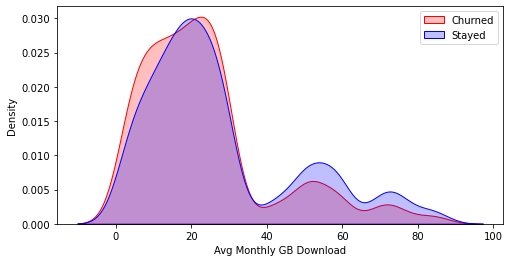

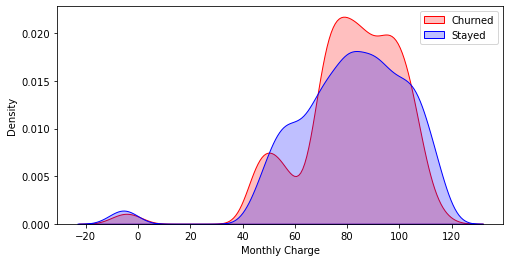

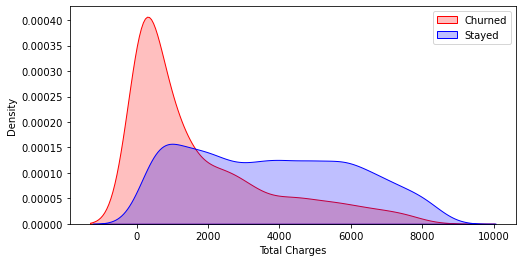

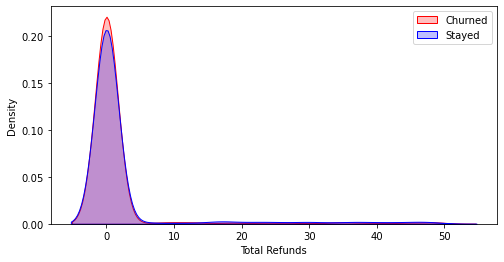

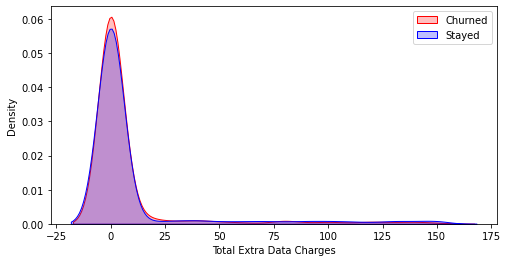

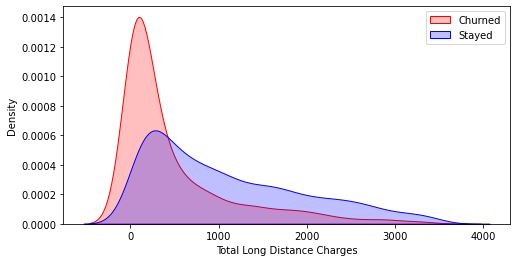

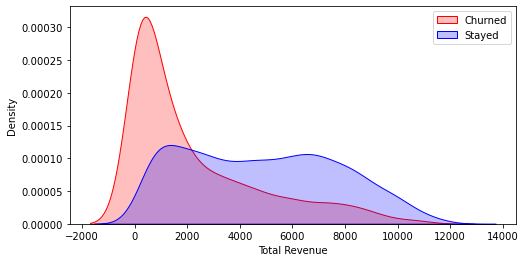

In [13]:
churn = df1.groupby(['Customer Status']).get_group('Churned')
stayed = df1.groupby(['Customer Status']).get_group('Stayed')

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(churn[col], color='red', shade=True)
    sns.kdeplot(stayed[col], color='blue', shade=True)

    plt.legend(['Churned', 'Stayed'])
    plt.ion()

## Data Transformation.

* Label encoding categorical columns.
* normalize numrical columns with minmaxscaler.
* feature selection from Pearson correlation
* One-hot-encode categorical columns with unieque values less than 10.

In [14]:
# Trqnsform the target as churned -> 0 and stayed -> 1
df1['Customer Status'] = np.where(df1['Customer Status'] == 'Stayed', 1, 0)
df1.head()

<ipython-input-14-8b7df7be2381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Customer Status'] = np.where(df1['Customer Status'] == 'Stayed', 1, 0)


,Unnamed: 0,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,1
1,1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,1
2,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0
3,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0
4,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0


In [15]:
df2 = df1.drop(['Unnamed: 0', 'Customer ID', 'Zip Code', 'City'], axis=1)

In [16]:
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']
cat_cols = [col for col in df2.columns if df2[col].dtype == 'object']

In [17]:
# low_cad, high_cad = [], []
# for i in cat_cols:
#     if df2[i].nunique() > 5:
#         high_cad.append(i)
#     else:
#         low_cad.append(i)
# len(low_cad), len(high_cad)

In [18]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [19]:
# le = OrdinalEncoder(encoded_missing_value=-1)
# high_tran = pd.DataFrame(le.fit_transform(df2[high_cad]), columns=[high_cad])

In [20]:
# df2.loc[:,high_cad] = high_tran

In [21]:
df3 = pd.get_dummies(df2, columns=cat_cols)

In [22]:
# df3['Offer'].unique()

In [23]:
# df3.isnull().sum()

In [24]:
scaler = MinMaxScaler()
df4 = pd.DataFrame(scaler.fit_transform(df3))
df4.columns = df3.columns
df4.head()

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.295082,0.0,0.241523,0.524540,0.181818,0.112676,0.844835,0.168675,0.587184,0.063690,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.442623,0.0,0.170810,0.603207,0.000000,0.112676,0.197632,0.096386,0.046602,0.057800,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.508197,0.0,0.115863,0.631031,0.000000,0.042254,0.666394,0.337349,0.651650,0.027534,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.967213,0.0,0.580316,0.216248,0.090909,0.169014,0.547366,0.024096,0.838835,0.138274,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.918033,0.0,0.177755,0.516544,0.272727,0.028169,0.130053,0.108434,0.729320,0.025978,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
df4.columns

Index(['Age', 'Number of Dependents', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Offer_None', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_Yes', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
  

### Correlation analysis.

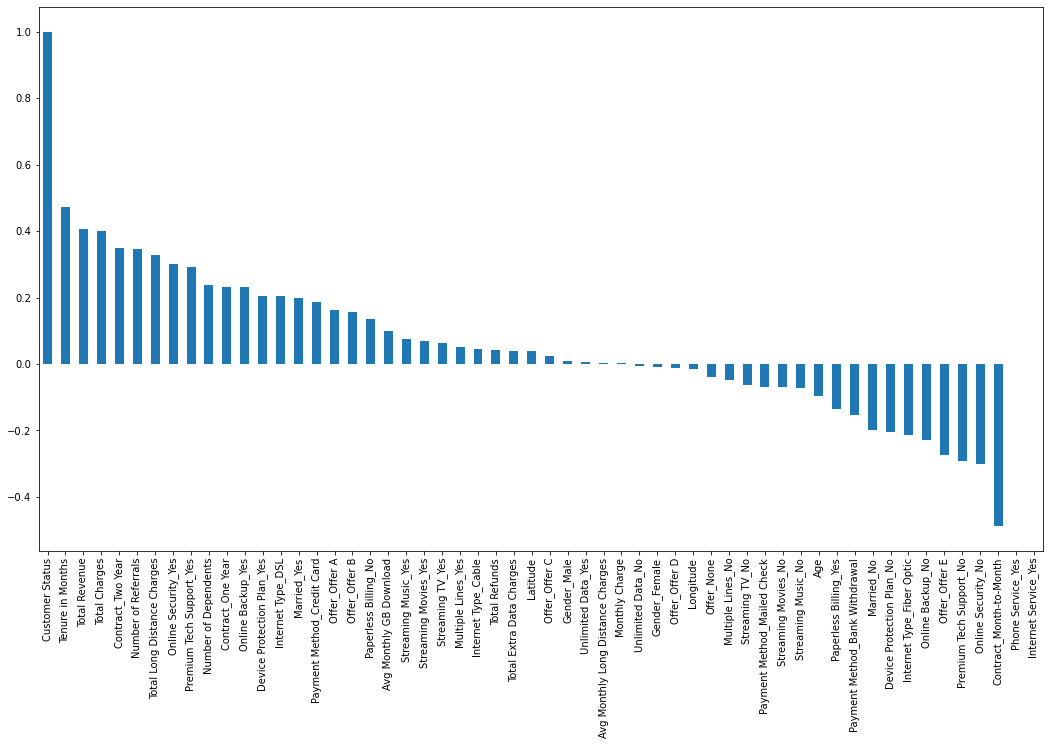

In [27]:
plt.figure(figsize=(18,10))
df4.corr()['Customer Status'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [28]:
df4.corr()['Customer Status'].sort_values(ascending=False)

Customer Status                      1.000000
Tenure in Months                     0.471463
Total Revenue                        0.407782
Total Charges                        0.401506
Contract_Two Year                    0.349257
Number of Referrals                  0.346350
Total Long Distance Charges          0.328475
Online Security_Yes                  0.301161
Premium Tech Support_Yes             0.293275
Number of Dependents                 0.237149
Contract_One Year                    0.231445
Online Backup_Yes                    0.230334
Device Protection Plan_Yes           0.205213
Internet Type_DSL                    0.204821
Married_Yes                          0.199354
Payment Method_Credit Card           0.185696
Offer_Offer A                        0.161890
Offer_Offer B                        0.156015
Paperless Billing_No                 0.135760
Avg Monthly GB Download              0.099546
Streaming Music_Yes                  0.073826
Streaming Movies_Yes              

In [29]:
features = ['Tenure in Months', 'Total Revenue', 'Total Charges', 'Contract_Two Year', 'Number of Referrals', 'Total Long Distance Charges', 'Online Security_Yes',
           'Premium Tech Support_Yes', 'Number of Dependents', 'Contract_One Year' ,'Online Backup_Yes', 'Device Protection Plan_Yes', 'Married_Yes', 'Internet Type_DSL',
           'Payment Method_Credit Card', 'Paperless Billing_No', 'Contract_Month-to-Month', 'Online Security_No', 'Premium Tech Support_No', 'Online Backup_No',
           'Internet Type_Fiber Optic', 'Device Protection Plan_No', 'Married_No', 'Payment Method_Bank Withdrawal', 'Paperless Billing_Yes']

feature1 = ['Tenure in Months', 'Total Revenue', 'Total Charges', 'Contract_Two Year', 'Number of Referrals', 'Total Long Distance Charges', 'Online Security_Yes',
           'Contract_Month-to-Month', 'Online Security_No', 'Premium Tech Support_No']

## Model Selection.

* Split data into train and validation using train-test-split with stratification.
* import model evaluation metrics such classification reportand f1-score
* Train different algorithms such as: KNN, LogosticRegression, SVM, RandomForest.
* check each model feature importances.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, log_loss, confusion_matrix
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
y = df4['Customer Status']
X = df4.drop(['Customer Status', 'Phone Service_Yes', 'Internet Service_Yes'],axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(X, y,  test_size=0.3, stratify=y, shuffle=True, random_state=2022)
x_valid

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
3333,0.393443,0.375,0.642856,0.298904,0.818182,0.760563,0.253981,0.614458,0.694369,0.485489,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
117,0.622951,0.000,0.432307,0.472895,0.000000,0.478873,0.894243,0.216867,0.547961,0.224453,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2034,0.147541,0.250,0.637717,0.180700,0.090909,0.478873,0.495304,0.963855,0.638835,0.292256,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2587,0.360656,0.000,0.161478,0.608936,0.090909,0.000000,0.370355,0.192771,0.621359,0.003136,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3192,0.622951,0.375,0.504859,0.246468,0.090909,0.661972,0.600245,0.614458,0.895146,0.573323,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.852459,0.000,0.163199,0.610697,0.090909,0.028169,0.822581,0.000000,0.900194,0.033760,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1469,0.360656,0.000,0.876093,0.014551,0.909091,0.619718,0.510412,0.325301,0.706796,0.403927,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2911,0.000000,0.000,0.107821,0.645766,0.000000,0.253521,0.476521,0.807229,0.529709,0.115987,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3459,0.754098,0.000,0.159835,0.592963,0.000000,0.690141,0.365659,0.108434,0.820971,0.552402,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
class_weight = class_weight.compute_class_weight(class_weight={0:0.65, 1:0.35}, classes=y_train.unique(), y=y_train)

In [33]:
class_weight

array([0.35, 0.65])

### KNearest Neighbor.

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
f1_score(knn.predict(x_valid), y_valid)

0.8151027207107163

In [36]:
print(classification_report(y_valid, knn.predict(x_valid), labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.65      0.66      0.65       476
      stayed       0.82      0.81      0.82       905

    accuracy                           0.76      1381
   macro avg       0.73      0.74      0.73      1381
weighted avg       0.76      0.76      0.76      1381



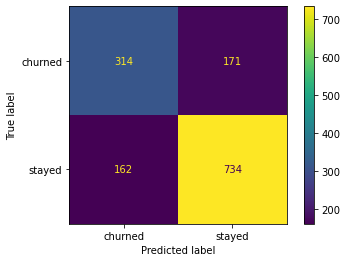

In [37]:
cm = confusion_matrix(knn.predict(x_valid), y_valid, labels=knn.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [38]:
log_loss(knn.predict(x_valid), y_valid)

8.32842090562333

### Logistic Regression

In [39]:
lr = LogisticRegression(max_iter=1000, class_weight={0:0.5, 1:0.5}, n_jobs=-1)
lr.fit(x_train, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, max_iter=1000, n_jobs=-1)

In [40]:
f1_score(y_valid, lr.predict(x_valid))

0.8689057421451788

In [41]:
print(classification_report(y_valid, lr.predict(x_valid), labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.77      0.71      0.74       476
      stayed       0.85      0.89      0.87       905

    accuracy                           0.82      1381
   macro avg       0.81      0.80      0.80      1381
weighted avg       0.82      0.82      0.82      1381



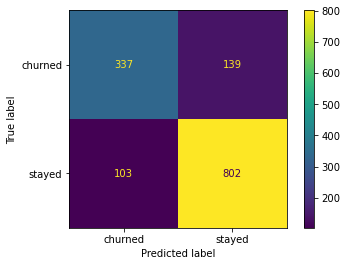

In [42]:
cm = confusion_matrix(y_valid, lr.predict(x_valid), labels=lr.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [43]:
log_loss(lr.predict(x_valid), y_valid)

6.052473748083776

In [44]:
lr.coef_

array([[-6.90709932e-01,  3.10529374e+00,  4.46437476e-01,
         3.83223906e-01,  4.01791577e+00,  2.63973339e+00,
         6.59729616e-02, -2.46240956e-03, -1.02658447e+00,
        -2.47731763e-01,  2.53342499e-01,  2.20997802e-01,
        -5.54440943e-02, -1.94118843e-01, -4.51259909e-02,
         4.60853780e-02,  5.56598167e-01, -5.55638780e-01,
         1.74786306e-02, -6.95746614e-01,  1.84168395e-01,
         3.22435125e-01,  6.26328445e-01, -4.53704594e-01,
         8.10595292e-02, -8.01001421e-02,  1.59091543e-02,
         2.80476482e-01, -2.95426249e-01, -1.64823513e-01,
         1.65782900e-01, -1.32125181e-01,  1.33084568e-01,
        -1.83263558e-02,  1.92857429e-02, -2.25339642e-01,
         2.26299029e-01,  1.43641146e-01, -1.42681759e-01,
         1.60095343e-02, -1.50501472e-02,  6.97116757e-02,
        -6.87522886e-02, -9.36811365e-02,  9.46405236e-02,
        -1.17874653e+00,  1.41166727e-01,  1.03853919e+00,
         1.87226652e-01, -1.86267265e-01,  9.26188559e-0

### Random Forest Classifier

In [45]:
rf = RandomForestClassifier(n_estimators=900, random_state=2022, warm_start=True, n_jobs=-1, criterion='log_loss', ccp_alpha=0.02,
                           class_weight={0:0.5, 1:0.5})
rf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.02, class_weight={0: 0.5, 1: 0.5},
                       criterion='log_loss', n_estimators=900, n_jobs=-1,
                       random_state=2022, warm_start=True)

In [46]:
rf_pred = rf.predict(x_valid)
f1_score(y_valid, rf_pred)

0.862137862137862

In [47]:
print(classification_report(y_valid, rf_pred, labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.85      0.51      0.64       476
      stayed       0.79      0.95      0.86       905

    accuracy                           0.80      1381
   macro avg       0.82      0.73      0.75      1381
weighted avg       0.81      0.80      0.78      1381



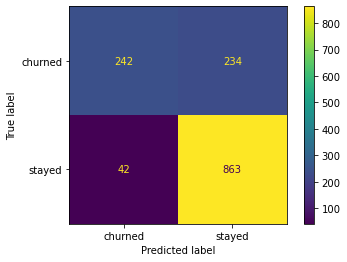

In [48]:
cm = confusion_matrix(y_valid, rf_pred, labels=rf.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [49]:
log_loss(rf_pred, y_valid)

6.902777601801171

In [54]:
def show_importance(model_attr):
    try:
        imps = model_attr
    except AttributeError:
        imps = model.coef_
    imp_dict = {}
    for x,y in zip(x_valid.columns, imps):
        imp_dict[x] = y
    imp_df = pd.DataFrame(data=imp_dict, index=['Importance']).T
    plt.figure(figsize=(20,8))
    sns.barplot(data=imp_df, x=imp_df.index, y='Importance')
    plt.xticks(rotation=85)
    plt.title("FEATURE IMPORTSNCES TO PREDICTOR.")
    plot = plt.show()
    return plot

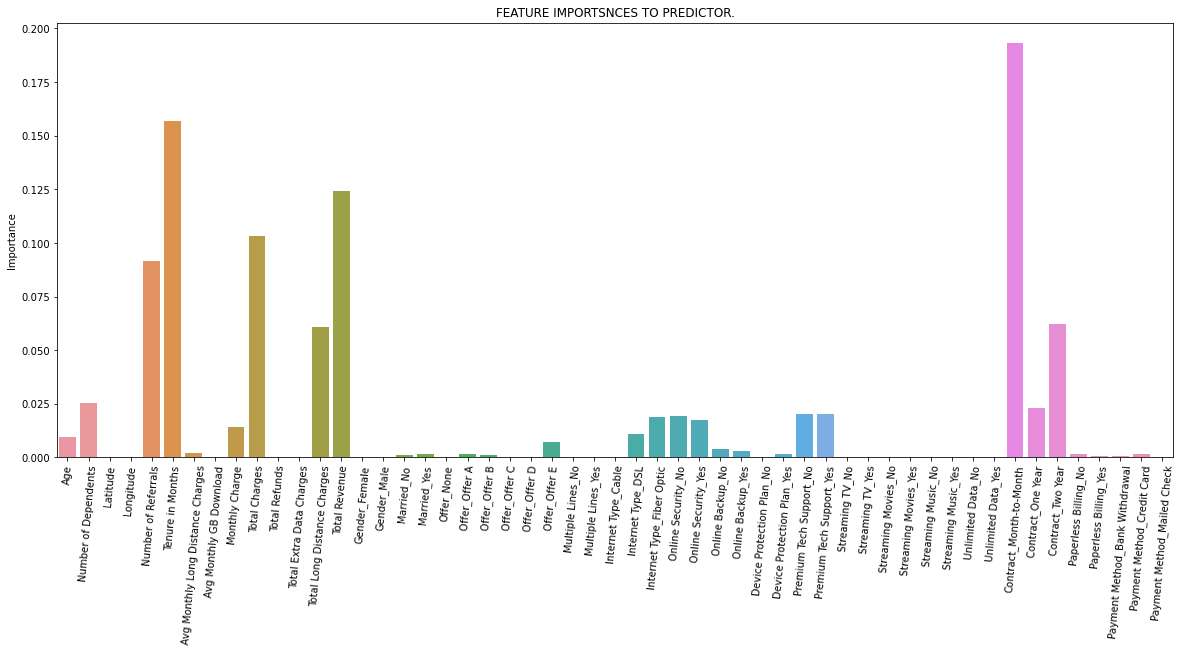

In [55]:
show_importance(rf.feature_importances_)

### Support Vector Machine.

In [56]:
sv = SVC(random_state=2022, class_weight={0:0.6, 1:0.4})
sv.fit(x_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, random_state=2022)

In [57]:
sv_pred = sv.predict(x_valid)
f1_score(sv_pred, y_valid)

0.8452787258248009

In [58]:
print(classification_report(y_valid, sv_pred, labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.69      0.77      0.73       476
      stayed       0.87      0.82      0.85       905

    accuracy                           0.80      1381
   macro avg       0.78      0.79      0.79      1381
weighted avg       0.81      0.80      0.81      1381



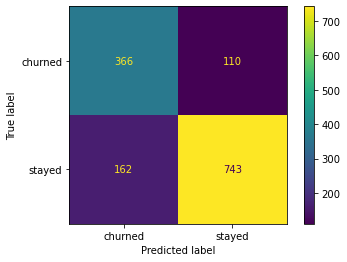

In [59]:
cm = confusion_matrix(y_valid, sv_pred, labels=sv.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [60]:
log_loss(sv_pred, y_valid)

6.802807179000287

In [61]:
# show_importance(sv.coef_)

In [62]:
import lightgbm as lgb

In [63]:
lg = lgb.LGBMClassifier(n_estimators=64, learning_rate=0.087, reg_alpha=0.021, reg_lambda=0.098, min_split_gain=0.159,
                        class_weight={0:0.67, 1:0.33}, random_state=2022)
lg.fit(x_train, y_train)

LGBMClassifier(class_weight={0: 0.67, 1: 0.33}, learning_rate=0.087,
               min_split_gain=0.159, n_estimators=64, random_state=2022,
               reg_alpha=0.021, reg_lambda=0.098)

In [64]:
lg_pred = lg.predict(x_valid)
print(classification_report(y_valid, lg_pred, labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.74      0.77      0.76       476
      stayed       0.88      0.86      0.87       905

    accuracy                           0.83      1381
   macro avg       0.81      0.82      0.81      1381
weighted avg       0.83      0.83      0.83      1381



In [65]:
f1_score(y_valid, lg_pred)

0.8694196428571428

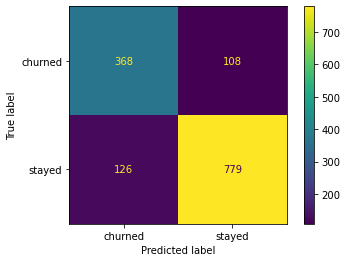

In [66]:
cm = confusion_matrix(y_valid, lg_pred, labels=lg.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [67]:
log_loss(lg_pred, y_valid)

5.852407259728678

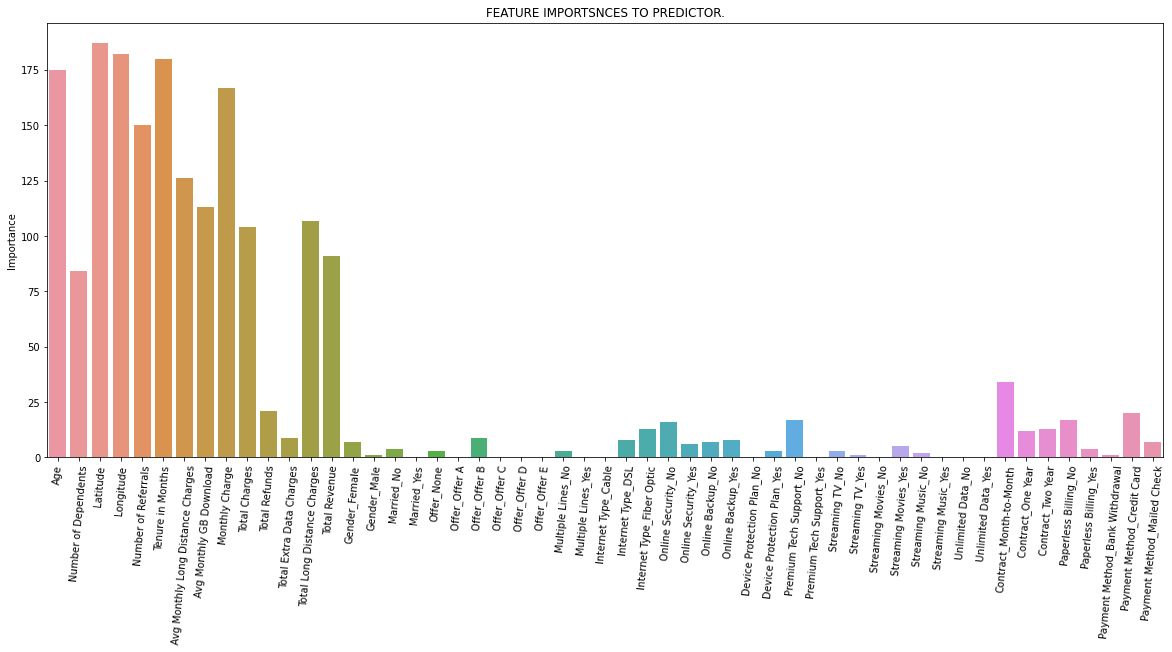

In [68]:
show_importance(lg.feature_importances_)

## Hyperparameter Tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'ccp_alpha': np.arange(0.001,0.9,0.001)}

In [ ]:
lg_grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=3)

In [ ]:
# lg_grid.fit(x_train, y_train)

In [ ]:
# lg_grid.best_score_

In [ ]:
# lg_grid.best_params_

In [ ]:
# pd.DataFrame(lg_grid.cv_results_)

In [ ]:
# lg_grid.scorer_

In [ ]:
X.isnull().sum()

### Treating Imbalanced Dataset With SMOTE(OverSampling).

In [69]:
from imblearn.over_sampling import SMOTE

In [77]:
sm = SMOTE(sampling_strategy='minority', random_state=2022, n_jobs=-1)

x_res, y_res = sm.fit_resample(X, y)

In [78]:
y_res.value_counts()

0.0    3015
1.0    3015
Name: Customer Status, dtype: int64

In [79]:
x_res.shape

(6030, 53)

In [149]:
# X = x_res.drop(['Phone Service_Yes', 'Internet Service_Yes'],axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_res, y_res,  test_size=0.3, stratify=y_res, shuffle=True, random_state=2022)
x_valid

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,...,Unlimited Data_No,Unlimited Data_Yes,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
109,0.934426,0.00,0.032043,0.701550,0.181818,0.436620,0.945896,0.096386,0.659417,0.261569,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4147,0.377049,0.00,0.081634,0.759211,0.090909,0.591549,0.766027,0.301205,0.689709,0.395445,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
240,0.278689,0.25,0.014868,0.742247,0.000000,0.971831,0.523887,0.180723,0.967767,0.907162,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
375,0.163934,0.00,0.554209,0.188540,0.000000,0.985915,0.835239,0.614458,0.941748,0.918924,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4716,0.557377,0.00,0.518398,0.271595,0.000000,0.086879,0.137247,0.194676,0.784335,0.063695,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,0.524590,0.00,0.160454,0.615185,0.090909,0.056338,0.842793,0.168675,0.740971,0.041449,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3050,0.721311,0.00,0.630795,0.337317,0.000000,0.000000,0.965700,0.240964,0.422913,0.000179,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5404,0.965995,0.00,0.570264,0.177236,0.088658,0.000000,0.346684,0.224441,0.700061,0.004308,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4001,0.918033,0.00,0.647467,0.282826,0.000000,0.211268,0.731319,0.168675,0.539029,0.113517,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### LightGBM with balanced dataset.

In [150]:
lgr = lgb.LGBMClassifier(n_estimators=90, learning_rate=0.087, reg_alpha=0.021, reg_lambda=0.098, min_split_gain=0.159,
                        random_state=2022)
lgr.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.087, min_split_gain=0.159, n_estimators=90,
               random_state=2022, reg_alpha=0.021, reg_lambda=0.098)

In [151]:
f1_score(lgr.predict(x_train), y_train)

0.9724988146040777

In [152]:
lgr_pred = lgr.predict(x_valid)
f1_score(y_valid, lgr_pred)

0.8822894168466522

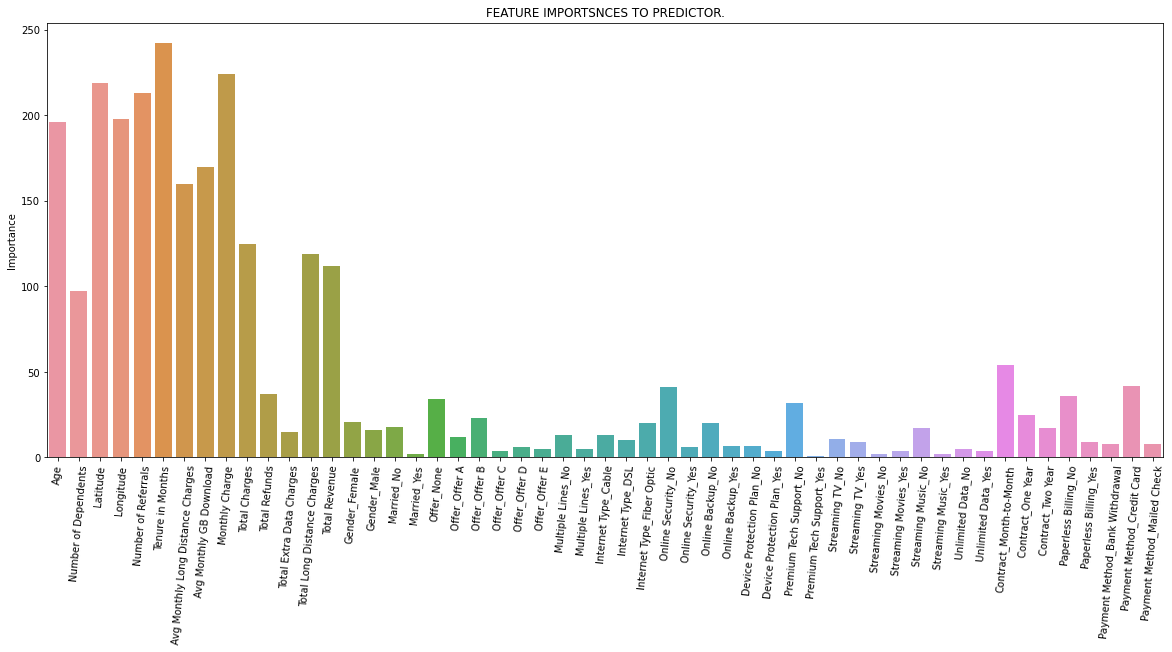

In [153]:
show_importance(lgr.feature_importances_)

### Logistic Regression with balanced dataset.

In [154]:
lrr = LogisticRegression(max_iter=1000, class_weight={0:0.45, 1:0.55}, n_jobs=-1, warm_start=True, C=0.6)
lrr.fit(x_train, y_train)

LogisticRegression(C=0.6, class_weight={0: 0.45, 1: 0.55}, max_iter=1000,
                   n_jobs=-1, warm_start=True)

In [155]:
f1_score(lrr.predict(x_train), y_train)

0.8286054827175208

In [156]:
lrr_pred = lrr.predict(x_valid)
f1_score(y_valid, lrr_pred)

0.839168490153173

In [157]:
print(classification_report(y_valid, lrr_pred, labels=[0,1], target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.84      0.83      0.84       904
      stayed       0.83      0.85      0.84       905

    accuracy                           0.84      1809
   macro avg       0.84      0.84      0.84      1809
weighted avg       0.84      0.84      0.84      1809



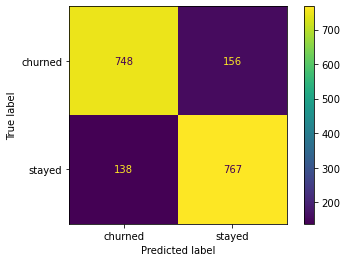

In [158]:
cm = confusion_matrix(y_valid, lrr_pred, labels=lrr.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['churned', 'stayed'])
dist.plot()
plt.show()

In [161]:
# show_importance(lrr.coef_)

In [162]:
lrr.coef_

array([[-6.34643528e-01,  3.18053555e+00,  6.92656696e-01,
         5.41533635e-01,  4.10562769e+00,  2.54205629e+00,
         5.26265239e-03,  2.55271608e-01, -8.98636766e-01,
        -1.36434385e-01,  5.81241579e-01,  1.40864129e-01,
        -6.55554778e-02, -1.18878330e-01,  3.36046933e-02,
        -3.38559102e-02,  5.22903158e-01, -5.23154375e-01,
        -3.39338667e-04, -8.59271349e-01,  2.58892151e-01,
         4.19529942e-01,  7.52344586e-01, -5.71407208e-01,
         1.04687370e-01, -1.04938587e-01, -4.46123543e-02,
         2.92843414e-01, -2.48482277e-01, -1.78386348e-01,
         1.78135131e-01, -1.01130830e-01,  1.00879614e-01,
        -6.75306571e-03,  6.50184880e-03, -2.27030481e-01,
         2.26779264e-01,  1.66751915e-01, -1.67003131e-01,
        -4.10026134e-02,  4.07513965e-02,  1.02605773e-01,
        -1.02856990e-01,  6.04220078e-02, -6.06732248e-02,
        -1.16917614e+00, -6.53273750e-03,  1.17545766e+00,
         2.01380641e-01, -2.01631858e-01,  3.79018761e-0

## Conclusion:

In oder to predict if a customer will churn or not, the feature importances from the trained models shows the rank features that contribute to the classification.

The most features are:

* Contract
* Monthly Charge
* Tenure in months
* Number of referrals
* Number of dependence
* Tech premium support
* Total renue
* Online security
* Internet type
* Age
* offer.